In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import datetime
import iisignature as sig
from tqdm import tqdm
from plotly.offline import init_notebook_mode, iplot
from plot_metric.functions import BinaryClassification
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.svm import TimeSeriesSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV


init_notebook_mode(connected=True) ## plotly init

In [2]:
#data import
filenames_list = os.listdir('SMNI_CMI_TRAIN/Train') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file
print(len(filenames_list))
for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('SMNI_CMI_TRAIN/Train/' + file_name) ## read from the file to df
    EEG_data = EEG_data.append(temp_df) ## add the file data to the main df

EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1) ## remove the unused column
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' ## remove comma sign from stimulus name

468


  0%|          | 0/468 [00:00<?, ?it/s]C:\Users\yousi\AppData\Local\Temp\ipykernel_23212\3614737585.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  0%|          | 1/468 [00:00<03:39,  2.13it/s]C:\Users\yousi\AppData\Local\Temp\ipykernel_23212\3614737585.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\yousi\AppData\Local\Temp\ipykernel_23212\3614737585.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\yousi\AppData\Local\Temp\ipykernel_23212\3614737585.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\yousi\AppData\Local\Temp\ipykernel_23212\3614737585.py:7: FutureWarning:

The frame.append method

In [3]:
#example try for create train set
temp_df = pd.read_csv('SMNI_CMI_TRAIN/Train/Data1.csv')
# print(temp_df['subject identifier'][0])
# print(temp_df["matching condition"][0])
# print(np.array(temp_df["sensor value"]).reshape([64,256]))

In [4]:
#S1: S1 obj - a single object shown;
s1 = 0
#S12: S2 nomatch - object 2 shown in a non matching condition (S1 differed from S2)
s12 = 0
#S21: S2 match - object 2 shown in a matching condition (S1 was identical to S2),
s21 = 0
s1_X_train = np.zeros((160,256,64))
s1_y_train = np.zeros(160)
s21_X_train = np.zeros((159,256,64))
s21_y_train = np.zeros(159)
s12_X_train = np.zeros((149,256,64))
s12_y_train = np.zeros(149)


classifier = {'a':1,'c':0}

filenames_list = os.listdir('SMNI_CMI_TRAIN/Train') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file
print(len(filenames_list))
for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('SMNI_CMI_TRAIN/Train/' + file_name) ## read from the file to df
    if temp_df["matching condition"][0] == "S1 obj":
        s1_X_train[s1] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
        s1_y_train[s1] = classifier[temp_df['subject identifier'][0]]
        s1 += 1
    if temp_df["matching condition"][0] == "S2 match":
        s21_X_train[s21] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
        s21_y_train[s21] = classifier[temp_df['subject identifier'][0]]
        s21 += 1
    if temp_df["matching condition"][0] == "S2 nomatch,":
        s12_X_train[s12] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
        s12_y_train[s12] = classifier[temp_df['subject identifier'][0]]
        s12 += 1
print(s1)
print(s21)
print(s12)

468


100%|██████████| 468/468 [00:05<00:00, 86.55it/s]

160
159
149


In [5]:
#t1: S1 obj - a single object shown;
t1 = 0
#t12: S2 nomatch - object 2 shown in a non matching condition (S1 differed from S2)
t12 = 0
#t21: S2 match - object 2 shown in a matching condition (S1 was identical to S2),
t21 = 0
t1_X_test = np.zeros((160,256,64))
t1_y_test = np.zeros(160)
t21_X_test = np.zeros((160,256,64))
t21_y_test = np.zeros(160)
t12_X_test = np.zeros((160,256,64))
t12_y_test = np.zeros(160)


classifier = {'a':1,'c':0}

filenames_list = os.listdir('SMNI_CMI_TEST') ## list of file names in the directory
EEG_data = pd.DataFrame({}) ## create an empty df that will hold data from each file
print(len(filenames_list))
for file_name in tqdm(filenames_list):
    if file_name == "Test":
        pass
    else:
        temp_df = pd.read_csv('SMNI_CMI_TEST/' + file_name) ## read from the file to df
        if temp_df["matching condition"][0] == "S1 obj":
            t1_X_test[t1] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
            t1_y_test[t1] = classifier[temp_df['subject identifier'][0]]
            t1 += 1
        if temp_df["matching condition"][0] == "S2 match":
            t21_X_test[t21] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
            t21_y_test[t21] = classifier[temp_df['subject identifier'][0]]
            t21 += 1
        if temp_df["matching condition"][0] == "S2 nomatch,":
            t12_X_test[t12] = np.transpose(np.array(temp_df["sensor value"]).reshape([64,256]))
            t12_y_test[t12] = classifier[temp_df['subject identifier'][0]]
            t12 += 1
print(t1)
print(t21)
print(t12)

481


100%|██████████| 481/481 [00:05<00:00, 90.97it/s]

160
160
160


In [16]:
for i in tqdm(range(3,20)):
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=i, n_jobs=10)
    knn.fit(s1_X_train, s1_y_train)
    print(knn.score(t1_X_test,t1_y_test))

  6%|▌         | 1/17 [00:07<02:04,  7.81s/it]

0.65625


 12%|█▏        | 2/17 [00:15<01:52,  7.47s/it]

0.6875


 18%|█▊        | 3/17 [00:22<01:42,  7.36s/it]

0.66875


 24%|██▎       | 4/17 [00:29<01:34,  7.29s/it]

0.69375


 29%|██▉       | 5/17 [00:36<01:27,  7.25s/it]

0.675


 35%|███▌      | 6/17 [00:43<01:19,  7.23s/it]

0.675


 41%|████      | 7/17 [00:50<01:11,  7.20s/it]

0.69375


 47%|████▋     | 8/17 [00:58<01:04,  7.20s/it]

0.69375


 53%|█████▎    | 9/17 [01:05<00:58,  7.30s/it]

0.6625


 59%|█████▉    | 10/17 [01:12<00:50,  7.26s/it]

0.675


 65%|██████▍   | 11/17 [01:19<00:43,  7.21s/it]

0.6375


 71%|███████   | 12/17 [01:27<00:35,  7.17s/it]

0.675


 76%|███████▋  | 13/17 [01:34<00:28,  7.16s/it]

0.65625


 82%|████████▏ | 14/17 [01:41<00:21,  7.13s/it]

0.68125


 88%|████████▊ | 15/17 [01:48<00:14,  7.14s/it]

0.64375


 94%|█████████▍| 16/17 [01:55<00:07,  7.18s/it]

0.69375


100%|██████████| 17/17 [02:02<00:00,  7.23s/it]

0.65625


In [17]:
clf = TimeSeriesSVC(C=1.0, kernel="gak", n_jobs=10)
clf.fit(s1_X_train, s1_y_train)
print(clf.score(t1_X_test, t1_y_test))

0.725


In [7]:
s1_sig_train = sig.sig(s1_X_train, 2)
s1_sig_test = sig.sig(t1_X_test, 2)

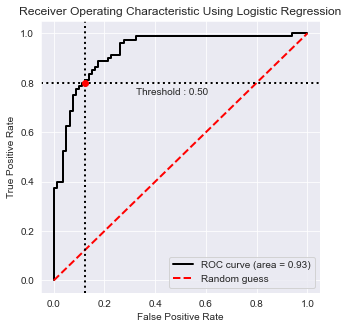

score is 0.9254687500000002


In [20]:
clf = LogisticRegression()
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)

bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = roc_auc_score(t1_y_test, y_pred_proba)
print("score is " + str(score))

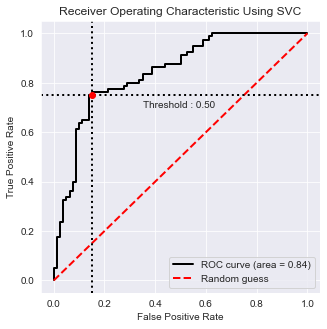

score is 0.8434375000000001


In [21]:
clf = SVC(probability=True)
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)
bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using SVC")
plt.show()
score = roc_auc_score(t1_y_test, y_pred_proba)
print("score is " + str(score))

In [22]:
for i in tqdm(range(3,20)):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=10)
    knn.fit(s1_sig_train, s1_y_train)
    y_pred = knn.predict(s1_sig_test)
    print(accuracy_score(t1_y_test, y_pred))

  6%|▌         | 1/17 [00:00<00:01,  8.63it/s]

0.7625
0.75
0.75
0.75
0.73125
0.74375
0.7625
0.75625


100%|██████████| 17/17 [00:00<00:00, 62.60it/s]

0.7625
0.75625
0.7625
0.75625
0.76875
0.7625
0.75625
0.74375
0.75625


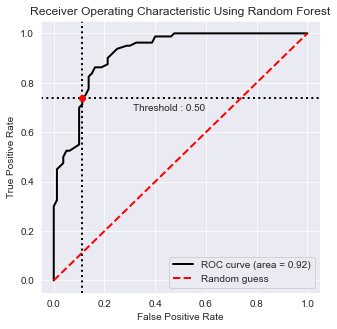

score is 0.9176562500000001


In [19]:
clf = AdaBoostClassifier()
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)

bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using AdaBoostClassifier")
plt.show()
score = roc_auc_score(t1_y_test, y_pred_proba)
print("score is " + str(score))

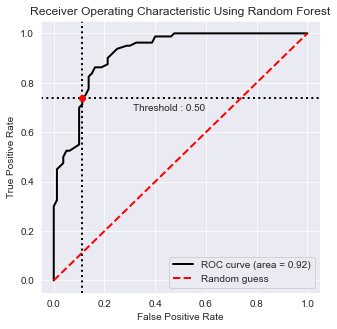

score is 0.9176562500000001


In [19]:
from tqdm import tqdm
for i in tqdm(range(3,20)):
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=i, n_jobs=10)
    knn.fit(s12_X_train, s12_y_train)
    print(knn.score(t12_X_test,t12_y_test))

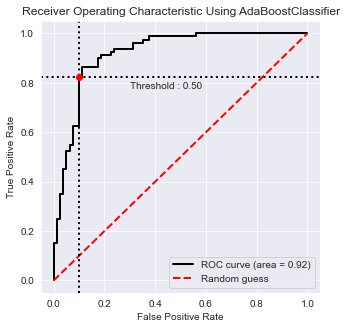

score is 0.9187500000000001


In [23]:
start = datetime.datetime.now()
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(s12_X_train, s12_y_train)
score = clf.score(t12_X_test, t12_y_test)
end = datetime.datetime.now()
print(score)
print(end-start)

In [8]:
s12_sig_train = sig.sig(s12_X_train, 2)
s12_sig_test = sig.sig(t12_X_test, 2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START bootstrap=True, max_depth=2, max_leaf_nodes=2, min_weight_fraction_leaf=0.01, n_estimators=100
[CV 1/5; 1/108] END bootstrap=True, max_depth=2, max_leaf_nodes=2, min_weight_fraction_leaf=0.01, n_estimators=100;, score=0.933 total time=   2.2s
[CV 2/5; 1/108] START bootstrap=True, max_depth=2, max_leaf_nodes=2, min_weight_fraction_leaf=0.01, n_estimators=100
[CV 2/5; 1/108] END bootstrap=True, max_depth=2, max_leaf_nodes=2, min_weight_fraction_leaf=0.01, n_estimators=100;, score=0.800 total time=   0.1s
[CV 3/5; 1/108] START bootstrap=True, max_depth=2, max_leaf_nodes=2, min_weight_fraction_leaf=0.01, n_estimators=100
[CV 3/5; 1/108] END bootstrap=True, max_depth=2, max_leaf_nodes=2, min_weight_fraction_leaf=0.01, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5; 1/108] START bootstrap=True, max_depth=2, max_leaf_nodes=2, min_weight_fraction_leaf=0.01, n_estimators=100
[CV 4/5; 1/108] END boots

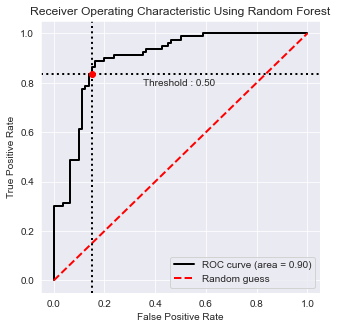

score is 0.8968750000000001
0:01:54.407371


In [12]:
start = datetime.datetime.now()
rf = RandomForestClassifier(random_state=0, n_jobs=10)
parameters = param_grid = {'min_weight_fraction_leaf': [0.01, 0.1, 0.5],
                           'bootstrap': [True, False],
                           'max_depth': (2, 5, 10),
                           'max_leaf_nodes': (2, 5, 10),
                           'n_estimators': (100, 200)}
clf = GridSearchCV(rf, parameters, verbose=10)
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)

bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Random Forest")
plt.show()
score = roc_auc_score(t12_y_test, y_pred_proba)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)

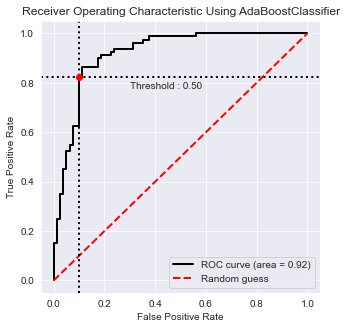

score is 0.9187500000000001


In [23]:
clf = RandomForestClassifier()
clf.fit(s1_sig_train, s1_y_train)
y_pred_proba = clf.predict_proba(s1_sig_test)[:,1]
y_pred = clf.predict(s1_sig_test)

bc = BinaryClassification(t1_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Random Forest")
plt.show()
score = roc_auc_score(t1_y_test, y_pred_proba)
print("score is " + str(score))

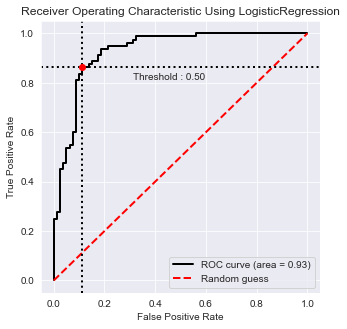

score is 0.9289062499999999
0:00:00.128738


In [28]:
start = datetime.datetime.now()
clf = LogisticRegression()
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)


bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using LogisticRegression")
plt.show()
score = roc_auc_score(t12_y_test, y_pred_proba)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)

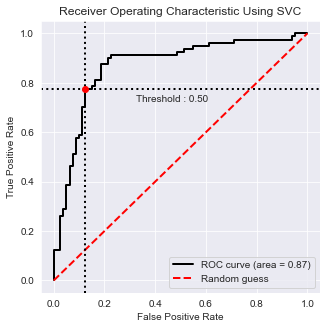

score is 0.868125
0:00:00.200791


In [29]:
start = datetime.datetime.now()
clf = SVC(probability = True)
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)


bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using SVC")
plt.show()
score = roc_auc_score(t12_y_test, y_pred_proba)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)

In [30]:
for i in tqdm(range(3,20)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(s12_sig_train, s12_y_train)
    y_pred = knn.predict(s12_sig_test)
    print(accuracy_score(t12_y_test, y_pred))

100%|██████████| 17/17 [00:00<00:00, 109.23it/s]

0.7625
0.75625
0.7625
0.7625
0.775
0.7625
0.76875
0.7625
0.76875
0.7625
0.7875
0.775
0.76875
0.7625
0.78125
0.76875
0.775


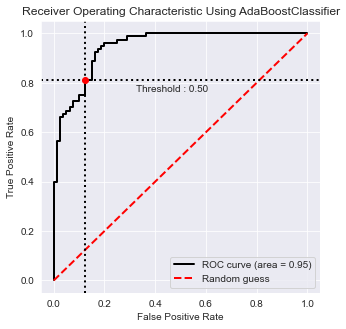

score is 0.94578125
0:00:01.948027


In [31]:
start = datetime.datetime.now()
clf = AdaBoostClassifier()
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)


bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using AdaBoostClassifier")
plt.show()
score = roc_auc_score(t12_y_test, y_pred_proba)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)

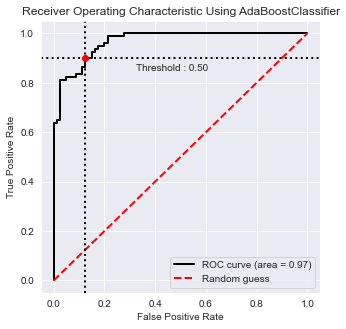

score is 0.96734375
0:00:07.284451


In [32]:
start = datetime.datetime.now()
clf = GradientBoostingClassifier()
clf.fit(s12_sig_train, s12_y_train)
y_pred_proba = clf.predict_proba(s12_sig_test)[:,1]
y_pred = clf.predict(s12_sig_test)

bc = BinaryClassification(t12_y_test, y_pred_proba, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using AdaBoostClassifier")
plt.show()
score = roc_auc_score(t12_y_test, y_pred_proba)
end = datetime.datetime.now()
print("score is " + str(score))
print(end-start)